<a href="https://colab.research.google.com/github/eric999j/PILTest/blob/master/TIOBE_Word_Cloud2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crawl TIOBE's annual information, save to programming.csv and plot chart.
https://www.codenong.com/cs105780846/

## Install dependency and connect google drive.

In [ ]:
!python3 -m pip install -q plotly # -q quiet install
!python3 -m pip install -q pandas

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline # For show chart.

In [ ]:
from google.colab import drive  
drive.mount('/content/gdrive')    
%cd /content/gdrive/"My Drive"/"Colab Notebooks"

Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks


In [ ]:
!pwd # Check we connected.

/content/gdrive/My Drive/Colab Notebooks


## Use request to get raw data, and analize using https://regex101.com/ 

In [ ]:
import requests
import re
import os
import csv
url = 'https://www.tiobe.com/tiobe-index/'
headers = {
 'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.113 Safari/537.36'
}
f = open('programming.csv', 'w', newline='')
writer = csv.DictWriter(f, ['Programming','Percent','Date'])
writer.writeheader()
response = requests.get(url, headers=headers)
html = response.text
result = ''.join(re.findall(r'series: (.*?)\}\);', html, re.DOTALL))
result = re.findall(r'({.*?})', result, re.DOTALL)
for item in result:
 name = ''.join(re.findall(r"{name : '(.*?)'", item, re.DOTALL))
 data = re.findall(r"\[Date.UTC(.*?)\]", item, re.DOTALL)
 for i in data:
  i = i.replace(' ', '')
  i = re.sub(r'[()]', '', i)
  value = i.split(',')[-1]
  time_list = i.split(',')[:3]
  time = ""
  for index, j in enumerate(time_list):
   if index !=0:
    if len(j) == 1:
     j = '0' + j
   if index == 0:
    time += j
   else:
    time += '-' + j
  temp = {
   'Programming': name,
   'Percent': value,
   'Date': time
  }
  writer.writerow(temp)
f.close()

## Draw interactive chart.

In [ ]:
import plotly.express as px
import pandas as pd
df = pd.read_csv('programming.csv')
fig = px.bar(df,
             y="Programming",
             x="Percent",
             animation_frame="Date",
             range_x=[0, df.Percent.max()],
             orientation='h',
             text='Percent',
             color="Programming")
fig.update_layout(width=500,
                  height=400,
                  xaxis_showgrid=False,
                  yaxis_showgrid=False,
                  showlegend=False)
fig.update_xaxes(title_text= "十年编程语言趋势图(微信订阅号：小猿学Python)")
fig.show()

# Using programming.csv to draw a wordcloud.

In [ ]:
!pip install wordcloud # Get description

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
?WordCloud # Check the csv

In [ ]:
df = pd.read_csv('programming.csv')  
print(df)  

     Programming  Percent        Date
0              C    20.24  2001-05-30
1              C    20.77  2001-06-30
2              C    20.75  2001-07-30
3              C    20.77  2001-08-28
4              C    19.75  2001-09-26
...          ...      ...         ...
1940         SQL     2.09  2020-04-02
1941         SQL     1.73  2020-05-01
1942         SQL     1.40  2020-06-04
1943         SQL     1.46  2020-07-02
1944         SQL     1.76  2020-08-06

[1945 rows x 3 columns]


In [ ]:
date="2020-08-06"
mask=df["Date"]==date
dm=df[mask].drop(['Date'], axis=1) # We have selected date, save the result and drop Date column.

In [ ]:
dm # Check the data we need.

,Programming,Percent
227,C,15.95
455,Java,13.48
683,Python,10.47
911,C++,7.11
1139,C#,4.58
1262,Visual Basic,4.12
1490,JavaScript,2.54
1718,PHP,2.49
1877,R,2.37
1944,SQL,1.76


In [ ]:
d = {}
for a, x in dm.values: # Change the data to a dictory.
    d[a] = x

d

{'C': 15.95,
 'C#': 4.58,
 'C++': 7.11,
 'Java': 13.48,
 'JavaScript': 2.54,
 'PHP': 2.49,
 'Python': 10.47,
 'R': 2.37,
 'SQL': 1.76,
 'Visual Basic': 4.12}

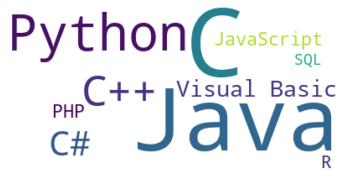

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white') #We can change word type..., too.
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
wordcloud.to_file(date+"_TIOBE.png") # Save to google drive.